# Exercise

Given two groups of 2-dimensional (x,y) coordinates, create a decision boundary separating the two.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
group1 = [[0.067, 0.210], [0.092, 0.210], [0.118, 0.143], [0.118, 0.176], 
          [0.765, 0.924], [0.807, 0.933], [0.849, 0.941], 
          [0.849, 0.798], [0.857, 0.849], [0.866, 0.899]
         ]

group2 = [[0.345, 0.378], [0.395, 0.319], [0.437, 0.261], [0.496, 0.328], [0.546, 0.395], 
          [0.605, 0.462], [0.655, 0.529], [0.697, 0.597], [0.706, 0.664], [0.681, 0.723], 
          [0.294, 0.445], [0.227, 0.521], [0.185, 0.597], [0.185, 0.689], [0.235, 0.748], 
          [0.319, 0.773], [0.387, 0.739], [0.437, 0.672], [0.496, 0.739], [0.571, 0.773], 
          [0.639, 0.765]
         ]

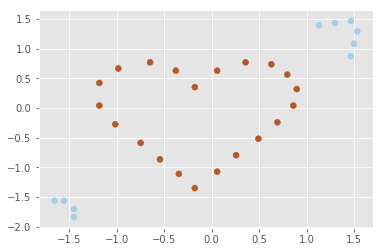

In [3]:
# Convert to ndarray
group1 = np.array(group1)
group2 = np.array(group2)

# Create label vector
y1 = np.ones(group1.shape[0])
y2 = np.ones(group2.shape[0]) * 2 

# Concatenate the vectors to create one dataset
X = np.concatenate((group1, group2), axis=0)
y = np.concatenate((y1, y2), axis=0)

Xt = StandardScaler().fit_transform(X)

# Plot the scaled data <3
plt.scatter(Xt.T[0], Xt.T[1], c=y, cmap='Paired')
plt.show()

In [4]:
[('linear',
  {'C': 0.0001,
   'coef0': 0.0001,
   'degree': 1,
   'gamma': 'scale',
   'shrinking': True}),
 ('rbf',
  {'C': 0.5,
   'coef0': 0.0001,
   'degree': 1,
   'gamma': 'scale',
   'shrinking': True}),
 ('poly',
  {'C': 0.1,
   'coef0': 0.2021181818181818,
   'degree': 6,
   'gamma': 'scale',
   'shrinking': True}),
 ('sigmoid',
  {'C': 2.5,
   'coef0': 0.0001,
   'degree': 1,
   'gamma': 'scale',
   'shrinking': True})]

[('linear',
  {'C': 0.0001,
   'coef0': 0.0001,
   'degree': 1,
   'gamma': 'scale',
   'shrinking': True}),
 ('rbf',
  {'C': 0.5,
   'coef0': 0.0001,
   'degree': 1,
   'gamma': 'scale',
   'shrinking': True}),
 ('poly',
  {'C': 0.1,
   'coef0': 0.2021181818181818,
   'degree': 6,
   'gamma': 'scale',
   'shrinking': True}),
 ('sigmoid',
  {'C': 2.5,
   'coef0': 0.0001,
   'degree': 1,
   'gamma': 'scale',
   'shrinking': True})]

In [5]:
# Instantiate classifier
svm = SVC(kernel='sigmoid', C=2.5, coef0=.0001)
svm.fit(Xt, y)

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0001,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

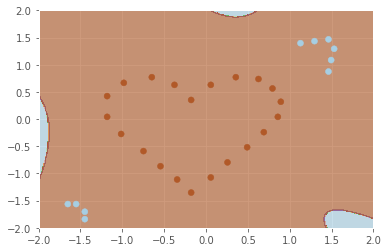

In [6]:
# Building up a visualization of the SVM decision boundaries
y_min, y_max = Xt.T[0].min() - 2, Xt.T[0].max() + 2
x_min, x_max = Xt.T[1].min() -2, Xt.T[1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z0 = (svm.predict(np.c_[xx.ravel(), yy.ravel()]))
Z0 = Z0.reshape(xx.shape)

plt.contourf(xx, yy, Z0, cmap='Paired', alpha=0.6)
plt.scatter(Xt.T[0], Xt.T[1], c=y, cmap='Paired')
plt.xlim(-2,2)
plt.ylim(-2,2)
# plt.xlabel('')
# plt.ylabel('')
plt.show()


# Grid search through kernels and C hyperparameter space

In [7]:
##########################################################################################

            # Takes about 20 minutes to run, results commented in next cell #

##########################################################################################

# parameters = {'C': [.0001, .001, .01, .1, .25, .5, .75, 1, 2.5, 5, 7.5, 10],
#               'degree': [x for x in range(1,11)],
#               'coef0': [x for x in np.linspace(.0001, 10, 100)],
#               'gamma': ['scale', 'auto'],
#               'shrinking': [True, False]
#              }
# kernels = ['linear', 'rbf', 'poly', 'sigmoid']
# best_hyperparams = []

# for k in kernels:
#     gscv = GridSearchCV(SVC(kernel=k), parameters, cv=3)
#     gscv.fit(Xt, y)
#     best_hyperparams.append((k, gscv.best_params_))
    
# best_hyperparams

In [8]:
# Grid search results

# [('linear',
#   {'C': 0.0001,
#    'coef0': 0.0001,
#    'degree': 1,
#    'gamma': 'scale',
#    'shrinking': True}),
#  ('rbf',
#   {'C': 0.5,
#    'coef0': 0.0001,
#    'degree': 1,
#    'gamma': 'scale',
#    'shrinking': True}),
#  ('poly',
#   {'C': 0.1,
#    'coef0': 0.2021181818181818,
#    'degree': 6,
#    'gamma': 'scale',
#    'shrinking': True}),
#  ('sigmoid',
#   {'C': 2.5,
#    'coef0': 0.0001,
#    'degree': 1,
#    'gamma': 'scale',
#    'shrinking': True})]

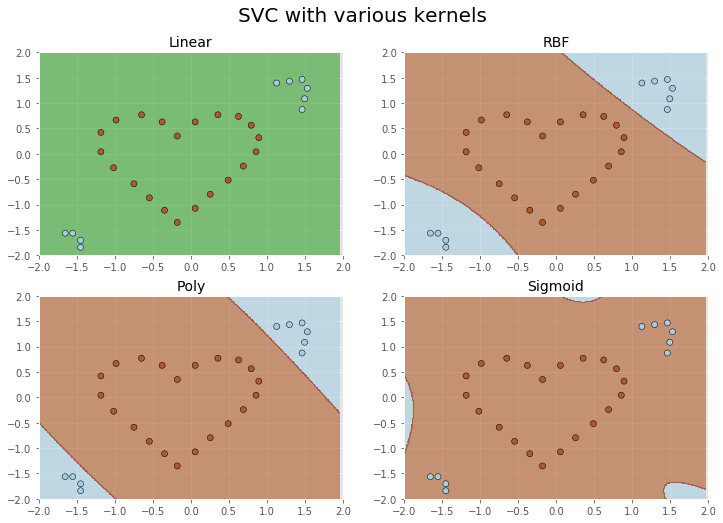

In [9]:
# Creating grid to predict SVM decision space
y_min, y_max = Xt.T[0].min() - .5, Xt.T[0].max() + .5
x_min, x_max = Xt.T[1].min() - .5, Xt.T[1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


# Master plot
plt.figure(figsize = (12,8))
plt.suptitle('SVC with various kernels', size = 20)


# Linear kernel
svm = SVC(kernel = 'linear', C = 0.0001)
svm.fit(Xt, y)
Z0 = (svm.predict(np.c_[xx.ravel(), yy.ravel()]))
Z0 = Z0.reshape(xx.shape)

plt.subplot(2,2,1)
plt.contourf(xx, yy, Z0, cmap='Paired', alpha=0.6)
plt.scatter(Xt.T[0], Xt.T[1], c=y, cmap='Paired', edgecolors='k')
plt.title("Linear", size=14)
plt.xlim(-2,2)
plt.ylim(-2,2)


# RBF kernel
svm = SVC(kernel='rbf', C=.50, coef0=.0001)
svm.fit(Xt, y)
Z0 = (svm.predict(np.c_[xx.ravel(), yy.ravel()]))
Z0 = Z0.reshape(xx.shape)

plt.subplot(2,2,2)
plt.contourf(xx, yy, Z0, cmap='Paired', alpha=0.6)
plt.scatter(Xt.T[0], Xt.T[1], c=y, cmap='Paired', edgecolors='k')
plt.title('RBF', size=14)
plt.xlim(-2,2)
plt.ylim(-2,2)


# Poly kernel
svm = SVC(kernel='poly', C=.10, coef0=.202, degree=6)
svm.fit(Xt, y)
Z0 = (svm.predict(np.c_[xx.ravel(), yy.ravel()]))
Z0 = Z0.reshape(xx.shape)

plt.subplot(2,2,3)
plt.contourf(xx, yy, Z0, cmap='Paired', alpha=0.6)
plt.scatter(Xt.T[0], Xt.T[1], c=y, cmap='Paired', edgecolors='k')
plt.title('Poly', size=14)
plt.xlim(-2,2)
plt.ylim(-2,2)


# Sigmoid kernel
svm = SVC(kernel='sigmoid', C=2.5, coef0=.0001)
svm.fit(Xt, y)
Z0 = (svm.predict(np.c_[xx.ravel(), yy.ravel()]))
Z0 = Z0.reshape(xx.shape)

plt.subplot(2,2,4)
plt.contourf(xx, yy, Z0, cmap='Paired', alpha=0.6)
plt.scatter(Xt.T[0], Xt.T[1], c=y, cmap='Paired', edgecolors='k')
plt.title('Sigmoid', size=14)
plt.xlim(-2,2)
plt.ylim(-2,2)

plt.subplots_adjust(top=0.9)
plt.show()


- Linear kernel doesn't end up with a solution within our model space
- RBF and Poly both segment the classes nicely
- Sigmoid makes an attempt to create both classes, but fails pretty hard.